<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#Import-Libraries-and-Data" data-toc-modified-id="Import-Libraries-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries and Data</a></span><ul class="toc-item"><li><span><a href="#Dropping-Useless-Columns" data-toc-modified-id="Dropping-Useless-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dropping Useless Columns</a></span></li><li><span><a href="#Cleaning-sqft_basement" data-toc-modified-id="Cleaning-sqft_basement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleaning sqft_basement</a></span></li><li><span><a href="#Checking-Nulls" data-toc-modified-id="Checking-Nulls-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Checking Nulls</a></span></li><li><span><a href="#Filling-Null-Values-with-Mode" data-toc-modified-id="Filling-Null-Values-with-Mode-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Filling Null Values with Mode</a></span><ul class="toc-item"><li><span><a href="#Showing-the-percentage-each-column-is-null-of-the-entire-database." data-toc-modified-id="Showing-the-percentage-each-column-is-null-of-the-entire-database.-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Showing the percentage each column is null of the entire database.</a></span></li><li><span><a href="#Pulling-out-the-index-of-null_perc-for-columns-with-any-nulls" data-toc-modified-id="Pulling-out-the-index-of-null_perc-for-columns-with-any-nulls-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Pulling out the index of null_perc for columns with any nulls</a></span></li><li><span><a href="#Getting-the-mode-for-each-of-the-null-containing-columns" data-toc-modified-id="Getting-the-mode-for-each-of-the-null-containing-columns-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Getting the mode for each of the null containing columns</a></span></li><li><span><a href="#Showing-the-null-values-again!" data-toc-modified-id="Showing-the-null-values-again!-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Showing the null values again!</a></span></li></ul></li></ul></li><li><span><a href="#First-Model!" data-toc-modified-id="First-Model!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First Model!</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-Columns" data-toc-modified-id="Preparing-the-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing the Columns</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Plotting-the-residuals" data-toc-modified-id="Plotting-the-residuals-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting the residuals</a></span><ul class="toc-item"><li><span><a href="#Model-Residual-QQ-Plot" data-toc-modified-id="Model-Residual-QQ-Plot-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Model Residual QQ Plot</a></span></li><li><span><a href="#Model-Residual-Scatter-Plot" data-toc-modified-id="Model-Residual-Scatter-Plot-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Model Residual Scatter Plot</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Linear Regression Model

> This is not a complete process, only getting a first model, normally I would use the OSEMN process like below.
>- **O**btain
- **S**crub
- **E**xplore
- **M**odel
- I**N**terpret

## Import Libraries and Data
> We are going to be using our process on the King's County Housing Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\12147\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<div class="shadow alert alert-warning">
    <strong>From the Head:</strong> 
    <ul><li>Looks like we have some null values in water front. I'm going to do a blanket and fill the null values with the mode.</li><li>There is also an issue with nulls sqft_basement that has a '?' in the data rather than a null<li>Doesn't look like we can use date or id for our regression so we'll get rid of them</li></ul
</div>

### Dropping Useless Columns

In [3]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [4]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1135.0        1
518.0         1
1481.0        1
4820.0        1
2570.0        1
Name: sqft_basement, Length: 304, dtype: int64

### Cleaning sqft_basement

In [5]:
df.sqft_basement = df.sqft_basement.apply(lambda x: 0 if x=='?' else x).astype('float')

<div class="shadow alert alert-info">
  <strong>Cleaning basement</strong><ul><li>Here we apply a lambda statement to make the value in the column 0 if that value is '?' <li>else we keep it the same.</li>  <li>Next we make it of type 'float' and assign the actual column to the applied column</li></ul>
</div>

In [6]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

<div class="shadow alert alert-success">
    <strong>Fixed!</strong><ul><li>Next we will check the quantity of null values</li></ul
</div>

### Checking Nulls

In [7]:
nulls = df.isna().sum()
nulls.sort_values(ascending=True)

price               0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
sqft_living15       0
grade               0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
condition           0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64

<div class="shadow alert alert-info">
  <strong>A few null values!</strong><ul><li>63 nulls in view</li><li>2,376 nulls in waterfront</li><li>3,842 nulls in yr_renovated</li></ul>
</div>

### Filling Null Values with Mode

#### Showing the percentage each column is null of the entire database.

In [8]:
null_perc = nulls[nulls>0]/len(df)
null_perc

waterfront      0.110015
view            0.002917
yr_renovated    0.177895
dtype: float64

#### Pulling out the index of null_perc for columns with any nulls

In [9]:
null_cols = list(null_perc.index)
null_cols

['waterfront', 'view', 'yr_renovated']

#### Getting the mode for each of the null containing columns

In [10]:
null_modes = dict(df[null_cols].mode())
null_modes

{'waterfront': 0    0.0
 Name: waterfront, dtype: float64, 'view': 0    0.0
 Name: view, dtype: float64, 'yr_renovated': 0    0.0
 Name: yr_renovated, dtype: float64}

<div class="shadow alert alert-warning">
  <strong>All 0.0!</strong> <ul><li>Seems that all of the null column's nulls are 0, we can simply use fillna(0).</li><li>Normally we would use the below for loop to fill with the mode, but this way you can see both methods.</li></ul>
<code>for col, mode in null_modes.items():
    self[col] = self[col].fillna(mode[0])</code>

</div>

In [11]:
df.fillna(0, inplace=True)

#### Showing the null values again!

In [12]:
nulls = df.isna().sum()

In [13]:
null_perc = nulls[nulls>0]/len(df)
null_perc

Series([], dtype: float64)

<div class="shadow alert alert-success">
  <strong>Success!</strong> No nulls left, time to model and plot the model's residuals
</div>

## First Model!

### Preparing the Columns

In [14]:
# The target is the column we are trying to predict
target = 'price'

# First we remove the target column, i.e 'price' and get the column names
# that are left
columns = df.drop(target, axis=1).columns

# Making the formula in the form ( target ~ col1 + col2 + col3 )
# This formula is fed to the statsmodels.formula.api.ols
cols_form = '+'.join(columns)
formula = '%s~%s' % (target, cols_form)
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

### Modeling

In [15]:
model = smf.ols(formula=formula, data=df).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:27:54   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.656e+06   2.93e+06      2.271      0.023    9.12e+05    1.24e+07
bedrooms      -3.589e+04   1900.636    -18.882      0.000   -3.96e+04   -3.22e+04
bathrooms      4.162e+04   3262.735     12.755      0.000    3.52e+04     4.8e+04
sqft_living     102.8320     18.076      5.689      0.000      67.401     138.263
sqft_lot          0.1281      0.048      2.673      0.008       0.034       0.222
floors         7000.6499   3600.684      1.944      0.052     -56.956    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.329e+04   2122.073     25.111      0.000    4.91e+04    5.74e+04
condition      2.685e+04   2346.458     11.443      0.000    2.23e+04    3.15e+04
grade          9.691e+04   2160.604     44.853      0.000    9.27e+04    1.01e+05
sqft_above       78.0057     18.067      4.318      0.000      42.593     113.419
sqft_basement    47.6352     17.907      2.660      0.008      12.537      82.734
yr_built      -2637.5367     71.932    -36.667      0.000   -2778.528   -2496.545
yr_renovated     23.5856      3.977      5.930      0.000      15.790      31.381
zipcode        -584.4582     32.991    -17.716      0.000    -649.122    -519.794
lat            6.007e+05   1.07e+04     55.939      0.000     5.8e+05    6.22e+05
long          -2.177e+05   1.32e+04    -16.546      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5139      3.451      6.235      0.000      14.751      28.277
sqft_lot15       -0.3877      0.073     -5.285      0.000      -0.531      -0.244
==============================================================================
Omnibus:                    18343.380   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1833646.592
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      47.575   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="shadow alert alert-danger">
  <strong>Quick Note on the Summary:</strong><ul><li>Floors has a P-value of > .05, which to us that is not meeting a predictive assumption</li><li>Thus we would have to deal with that before making a future model</li></ul>
</div>

### Plotting the residuals
> Before we can decipher a model, we need to see where the residuals lie

#### Model Residual QQ Plot

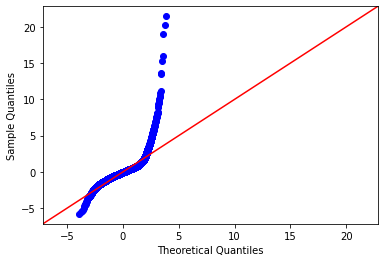

In [17]:
qqplot = sm.graphics.qqplot(model.resid, fit=True, line='45')

<div class="shadow alert alert-info">
  <strong>From the plot:</strong><ul><li>The tail is almost straight down the line</li><li>The head on the other hand is shooting for the stars, while the line continues along the horizon</li></ul>
</div>


#### Model Residual Scatter Plot

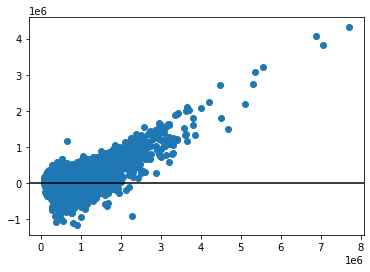

In [18]:
plt.scatter(x=df[target], y=model.resid)
plt.axhline(0, color='k')

<div class="shadow alert alert-info">
  <strong>Major </strong>lack of <a href="https://www.geeksforgeeks.org/heteroscedasticity-in-regression-analysis/">homoscedasticity</a>, breaking our predictive assumption of the model
</div>

## Summary

<div class="shadow alert alert-success">
    <b>From the Model and Residual Plots:</b>
        <ul>
            <li>R-squared of .7 shows the model predicts correctly 70% of the time <b>if</b> the plots lined up perfectly, thus fulfilling our assumptions perfectly</li>
            <li>The QQ plot is skewed right indicating we need to do some normalization and outlier removal on the data. </li>
            <li>The Residual Scatter plot shows a linear like shape.  We are aiming for homoscedasticity</li>
            <li>There is only one high pvalue currently, but we still need to get out the categorical columns. i.e ( zipcode, view, floors ) </li>
        </ul>
    </div>

In [19]:
# Styling, ignore...

from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()